Script for plotting evolution of system indicators for single replication of the experiment

In [1]:
### INPUT ###
scenario_name = 'sp-repl_id-1'
n_days_eql = 10
dem_mgmt_schemes = ['None', 'cgp', 'lpr', 'tmc15', 'tmc10', 'tmc5']
dem_mgmt_labels = ['None', 'CGP', 'LPR', 'TMC15', 'TMC10', 'TMC5']
mode_labels = ["Car", "RH - solo", "RH - pool", "PT", "Bike"]

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from eval_utils import *
import matplotlib.ticker as mtick

In [3]:
## Initialise evaluation ##

# Set paths
path = os.getcwd()
result_path = os.path.join(path,'..','..','..','results')

# Initialise dictionaries that will contain different demand management schemes
params = {}
evo_df = {}

In [4]:
# Load different demand management schemes
for scheme in dem_mgmt_schemes:
    # Result path for demand management scenario
    scheme_path = os.path.join(result_path, '{}-{}'.format(scheme, scenario_name))
    if os.path.exists(scheme_path):
        # Load params
        with open(os.path.join(scheme_path,'0_params.json')) as f:
            params[scheme] = json.load(f)
        # Load relevant csv's: market shares and credit market indicators
        market_shares = load_market_indicators(scheme_path)
        market_shares.index.name = 'day'
        evo_df[scheme] = market_shares.copy().drop(['ptcp_dem_mh','ptcp_sup_mh','ptcp_sup_sh_0','ptcp_sup_sh_1'], axis=1)
        # evo_df[scheme] = market_shares[['ptcp_dem_sh_0','ptcp_dem_sh_1','bike','car','pt']].copy()
        evo_df[scheme] = evo_df[scheme].rename(columns={'ptcp_dem_sh_0': 'rh_solo', 'ptcp_dem_sh_1': 'rh_pool', 'paxkm_rs_0': 'paxkm_solo', 'paxkm_rs_1': 'paxkm_pool', 'vkt_rs_0': 'vkt_solo', 'vkt_rs_1': 'vkt_pool'})
        if scheme.startswith('tmc'):
            evo_df[scheme]['not_enough_credit'] = market_shares['not_enough_credit']
            tmc_indicators = load_tmc_indicators(scheme_path)
            tmc_indicators.index.name = 'day'
            evo_df[scheme] = pd.concat([evo_df[scheme], tmc_indicators], axis=1)
            evo_df[scheme] = evo_df[scheme].loc[evo_df[scheme].index >= (params[scheme]['nD'] - params[scheme]['tmc']['duration'])]
            evo_df[scheme].reset_index(drop=True, inplace=True)
            evo_df[scheme].index.name = 'day'

In [111]:
evo_df['tmc15']

,rh_solo,rh_pool,bike,car,pt,not_enough_credit,paxkm_bike,paxkm_car,paxkm_pt,paxkm_solo,...,xp_delay,perc_delay,vkt_car,vkt_solo,vkt_pool,total_perc_gtt,price,transaction_volume,oversupply,mean_balance
day,,,,,,,,,,,,,,,,,,,,,
0,140,362,7190,1141,1167,0,43200.320084,7287.144221,7399.305296,757.073633,...,1.235670,1.234428,7287.144221,976.909623,2455.028622,7119.213233,0.04,502726,254876,450.000000
1,158,354,7161,1152,1175,0,42923.765526,7480.021139,7393.891124,861.679885,...,1.236926,1.234927,7480.021139,1152.191263,2395.814490,7101.863618,0.05,621184,-72938,438.062429
2,153,368,7195,1111,1173,0,43300.213605,7086.175567,7406.382731,836.950570,...,1.234969,1.234936,7086.175567,1053.334336,2456.468751,7112.087613,0.05,671768,-4243,425.785705
3,142,367,7141,1159,1191,0,42899.669448,7298.579177,7721.887372,740.864281,...,1.236021,1.235153,7298.579177,1015.125310,2465.059267,7130.880970,0.05,616540,97073,413.924912
4,152,337,7236,1102,1173,0,43467.705971,7117.812165,7420.705226,801.556976,...,1.233872,1.234897,7117.812165,1046.857372,2258.188707,7129.539906,0.05,580669,171738,401.962117
5,149,384,7177,1139,1151,0,43076.999624,7196.314591,7405.344714,801.714583,...,1.236828,1.235283,7196.314591,1101.344253,2655.286866,7103.537809,0.06,580069,-152090,390.281034
6,138,395,7192,1131,1144,0,43134.047799,7228.799135,7324.198964,751.828717,...,1.236228,1.235472,7228.799135,976.200742,2641.052736,7096.657358,0.06,599836,-87619,378.204356
7,125,389,7234,1077,1175,0,43518.256572,6800.043937,7433.072612,669.878586,...,1.234047,1.235187,6800.043937,851.873085,2726.552608,7131.739079,0.06,634425,-24599,366.149077
8,142,376,7264,1077,1141,0,43718.926731,6776.244087,7288.956094,770.216964,...,1.233856,1.234921,6776.244087,1010.435020,2560.382628,7128.598318,0.06,600539,71451,354.613803


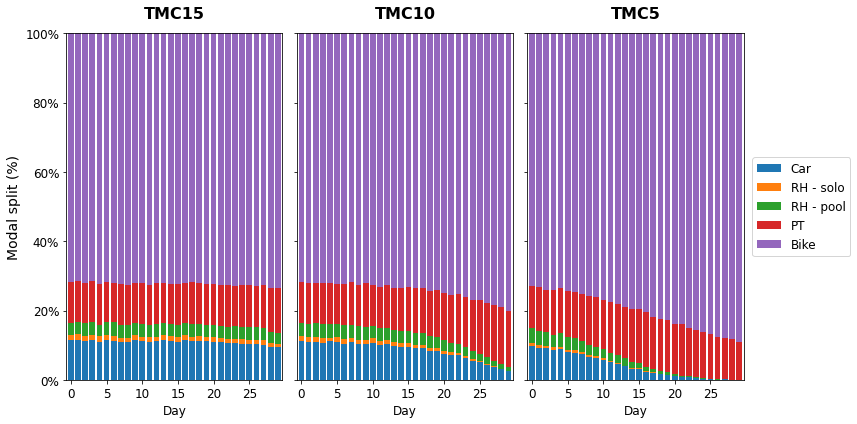

In [109]:
### Plot TMC scenario evolution
n_tmc_scenarios = sum(1 for item in dem_mgmt_schemes if item.startswith("tmc"))
# height_ratios = [2, 1, 1, 1]
fig, axes = plt.subplots(nrows=1, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0

for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"): 
        # Plot 1: market shares
        evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].div(params[scheme]['nP']).mul(100).plot(kind='bar', stacked=True, ax=axes[i], width=0.8)
        axes[i].set_ylabel('Modal split (%)',fontsize=14)
        axes[i].get_legend().remove()
        axes[i].set_xticks(range(0, params[scheme]['tmc']['duration'], 5))
        axes[i].set_xticklabels(range(0, params[scheme]['tmc']['duration'], 5),rotation=0)
        axes[i].set_xlabel('Day', fontsize=12)
        axes[i].set_ylim(0,100)
        axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())

        # # Plot 4: mean_balance
        # plot_index = 3
        # evo_df[scheme]['mean_balance'].plot(ax=axes[plot_index, i])
        # axes[plot_index, i].set_ylabel('Avg. credit balance', fontsize=14)
        # axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # # Plot 2: credit_price
        # plot_index = 1
        # evo_df[scheme]['price'].plot(ax=axes[plot_index, i])
        # axes[plot_index, i].set_ylabel('Credit price (€)', fontsize=14)
        # axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # # Plot 3: transaction volume
        # plot_index = 2
        # (evo_df[scheme]['transaction_volume'] / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        # ((abs(evo_df[scheme]['oversupply'])) / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        # axes[plot_index, i].set_ylabel('Avg. buy/sell offer quant.', fontsize=14)
        # axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Subtitle for scheme
        axes[i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=15, fontsize=16)

        if i == n_tmc_scenarios-1:
            axes[i].legend(labels=mode_labels, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)
            # axes[2, i].legend(labels=['Successful', 'Denied'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)

        i+=1

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.savefig(os.path.join(path,'tmc-evo-modalsplit.png'), facecolor='w')


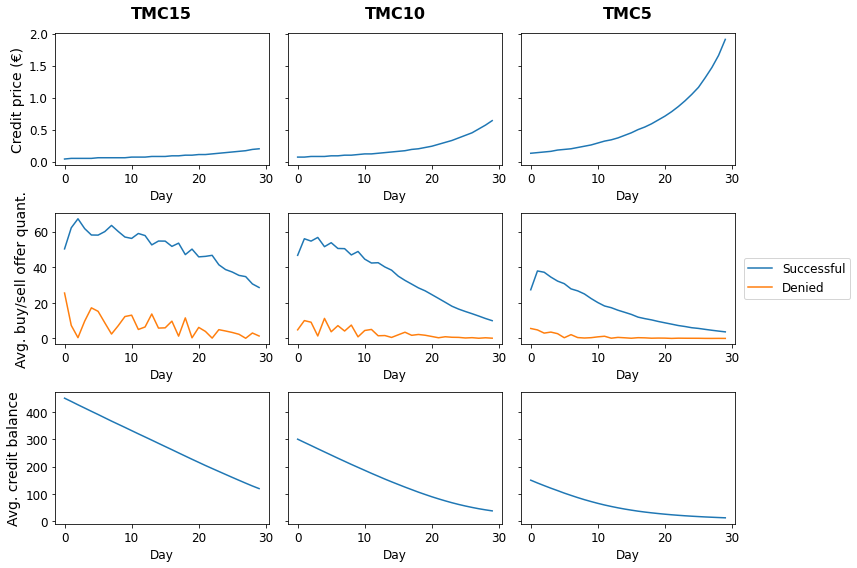

In [107]:
### Plot TMC scenario evolution
n_tmc_scenarios = sum(1 for item in dem_mgmt_schemes if item.startswith("tmc"))
height_ratios = [1, 1, 1]
fig, axes = plt.subplots(nrows=3, ncols=n_tmc_scenarios, figsize=(12, 8), sharey='row', gridspec_kw={'height_ratios': height_ratios})
i = 0

for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"): 
        # Plot 1: market shares
        # evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].div(params[scheme]['nP']).mul(100).plot(kind='bar', stacked=True, ax=axes[0, i], width=0.8)
        # axes[0, i].set_ylabel('Modal split (%)',fontsize=14)
        # axes[0, i].get_legend().remove()
        # axes[0, i].set_xticks(range(0, params[scheme]['tmc']['duration'], 5))
        # axes[0, i].set_xticklabels(range(0, params[scheme]['tmc']['duration'], 5),rotation=0)
        # axes[0, i].set_xlabel('Day', fontsize=12)
        # axes[0, i].set_ylim(0,100)
        # axes[0, i].yaxis.set_major_formatter(mtick.PercentFormatter())

        # Plot 4: mean_balance
        plot_index = 2
        evo_df[scheme]['mean_balance'].plot(ax=axes[plot_index, i])
        axes[plot_index, i].set_ylabel('Avg. credit balance', fontsize=14)
        axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Plot 2: credit_price
        plot_index = 0
        evo_df[scheme]['price'].plot(ax=axes[plot_index, i])
        axes[plot_index, i].set_ylabel('Credit price (€)', fontsize=14)
        axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Plot 3: transaction volume
        plot_index = 1
        (evo_df[scheme]['transaction_volume'] / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        ((abs(evo_df[scheme]['oversupply'])) / params[scheme]['nP']).plot(ax=axes[plot_index, i])
        axes[plot_index, i].set_ylabel('Avg. buy/sell offer quant.', fontsize=14)
        axes[plot_index, i].set_xlabel('Day', fontsize=12)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=15, fontsize=16)

        if i == n_tmc_scenarios-1:
            # axes[0, i].legend(labels=mode_labels, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)
            axes[1, i].legend(labels=['Successful', 'Denied'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=12)

        i+=1

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.savefig(os.path.join(path,'tmc-evo-trading.png'), facecolor='w')


,None,cgp,lpr,tmc15,tmc10,tmc5
car,17.560,14.057,9.023,10.902333,8.489667,3.923000
rh_solo,2.431,1.716,2.741,1.335667,0.913333,0.334333
rh_pool,4.271,5.656,5.363,3.581333,3.164333,1.797000
pt,9.608,10.823,12.541,11.842667,13.238333,13.757333
bike,66.130,67.748,70.332,72.338000,74.194333,80.188333
not_enough_credit,0.000,0.000,0.000,0.000000,0.000000,0.000000


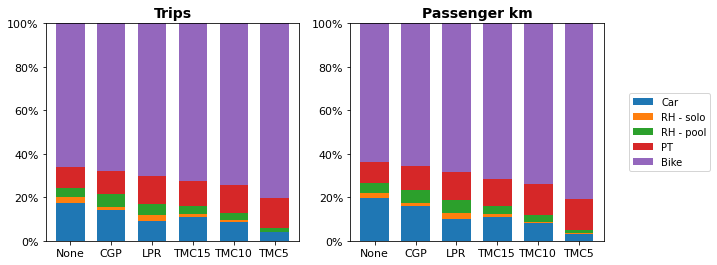

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

### Determine average indicators for TMC scenario - market share in trips
modal_split_trips = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        modal_split_trips[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].tail(n_days_eql).sum().div(params[scheme]['nP']*n_days_eql).mul(100)
    else:
        modal_split_trips[scheme] = evo_df[scheme][['car','rh_solo','rh_pool', 'pt', 'bike','not_enough_credit']].sum().div(params[scheme]['nP']*params[scheme]['tmc']['duration']).mul(100)
modal_split_trips.T.plot.bar(stacked=True, rot=0, ax=axes[0], width=0.7)
axes[0].get_legend().remove()
axes[0].set_xticklabels(dem_mgmt_labels)
axes[0].set_title('Trips', fontweight='bold', fontsize=14)
axes[0].set_ylim(0,100)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
modal_split_trips

### Determine average indicators for TMC scenario - market share in pax km
modal_split_paxkm = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    df = evo_df[scheme][['paxkm_car','paxkm_solo','paxkm_pool','paxkm_pt', 'paxkm_bike']]
    if not scheme.startswith('tmc'):
        modal_split_paxkm[scheme] = df.tail(n_days_eql).sum(axis=0).div(df.tail(n_days_eql).sum().sum()).mul(100)
    else:
        modal_split_paxkm[scheme] = df.sum(axis=0).div(df.sum().sum()).mul(100)
modal_split_paxkm.T.plot.bar(stacked=True, ax=axes[1], width=0.7, rot=0)
axes[1].set_xticklabels(dem_mgmt_labels)
axes[1].legend(labels=mode_labels, bbox_to_anchor=(1.1, 0.5), loc="center left", borderaxespad=0)
axes[1].set_title('Passenger km', fontweight='bold', fontsize = 14)
axes[1].set_ylim(0,100)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
modal_split_paxkm

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)
plt.savefig(os.path.join(path,'market-shares.png'), facecolor='w')

modal_split_trips

None     1.000000
cgp      0.882787
lpr      0.723379
tmc15    0.605256
tmc10    0.449169
tmc5     0.196283
dtype: float64

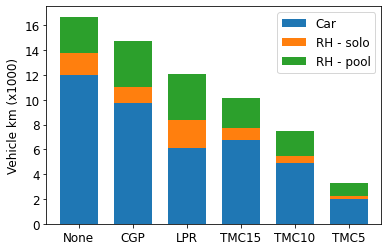

In [115]:
# Vehicle kilometres
vkt = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        vkt[scheme] = evo_df[scheme][['vkt_car', 'vkt_solo', 'vkt_pool']].tail(n_days_eql).mean()
    else:
        vkt[scheme] = evo_df[scheme][['vkt_car', 'vkt_solo', 'vkt_pool']].mean()
ax = (vkt / 1000).T.plot.bar(stacked=True, rot=0, width=0.7)
ax.set_xticklabels(dem_mgmt_labels, fontsize=12)
ax.set_ylabel('Vehicle km (x1000)', fontsize=12)
ax.legend(labels=['Car', 'RH - solo', 'RH - pool'], fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(path,'vkt.png'), facecolor='w')
(vkt / vkt['None'].sum()).sum(axis=0)

,None,cgp,lpr,tmc15,tmc10,tmc5
total_perc_gtt,1.0,1.013326,1.034269,1.050484,1.073083,1.109691


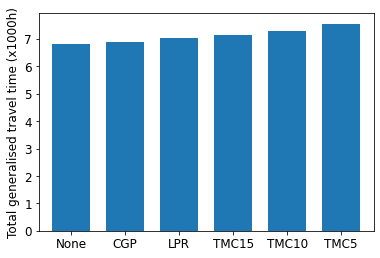

In [117]:
# Perceived gtt
perc_gtt = pd.DataFrame()
for scheme in dem_mgmt_schemes:
    if not scheme.startswith('tmc'):
        perc_gtt[scheme] = evo_df[scheme][['total_perc_gtt']].tail(n_days_eql).mean()
    else:
        perc_gtt[scheme] = evo_df[scheme][['total_perc_gtt']].mean()
ax = (perc_gtt / 1000).T.plot.bar(rot=0, width=0.7)
ax.set_xticklabels(dem_mgmt_labels, fontsize=12)
ax.get_legend().remove()
ax.set_ylabel('Total generalised travel time (x1000h)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(path,'gtt.png'), facecolor='w')

perc_gtt / perc_gtt.loc['total_perc_gtt']['None']

In [10]:
# TMC - Indicators on last day
travs_df = dict()
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        last_day = evo_df[scheme].index.values[-1]
        travs_df[scheme] = pd.read_csv(os.path.join(result_path, '{}-{}'.format(scheme, scenario_name), 'day_{}_travs.csv'.format(last_day)))
travs_df['tmc10']

,pax,chosen_mode,time_occ_1,time_occ_2,time_occ_3,informed,days_since_reg,tmc_balance,net_purchase,denied_order,...,xp_km_fare_0,xp_km_fare_1,registered_0,registered_1,expected_wait_0,expected_wait_1,expected_ivt_0,expected_ivt_1,expected_km_fare_0,expected_km_fare_1
0,0,rs_1,371.15,NaN,NaN,True,35,9.55848,24,0,...,NaN,1.0,True,True,131.851763,127.274621,311.146344,312.550375,1.5,1.0
1,1,bike,NaN,NaN,NaN,True,35,24.00000,0,-1,...,NaN,NaN,True,True,180.000000,180.000000,576.442249,691.730699,1.5,1.0
2,2,pt,NaN,NaN,NaN,True,35,14.27756,12,0,...,NaN,NaN,True,True,180.000000,88.003872,660.451592,741.633022,1.5,1.0
3,3,bike,NaN,NaN,NaN,True,35,35.00000,4,0,...,NaN,NaN,True,True,180.000000,180.000000,495.835708,595.002850,1.5,1.0
4,4,bike,NaN,NaN,NaN,True,35,27.00000,-17,0,...,NaN,NaN,True,True,180.000000,180.000000,455.179856,546.215827,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,bike,NaN,NaN,NaN,True,35,23.00000,-10,0,...,NaN,NaN,True,True,180.000000,180.000000,481.893402,578.272082,1.5,1.0
9996,9996,bike,NaN,NaN,NaN,True,35,35.93800,0,-4,...,NaN,NaN,True,True,180.000000,180.000000,979.064059,1174.876871,1.5,1.0
9997,9997,bike,NaN,NaN,NaN,True,35,58.80350,3,0,...,NaN,NaN,True,True,180.000000,180.000000,717.997057,861.596468,1.5,1.0
9998,9998,car,NaN,NaN,NaN,True,35,2.23391,34,0,...,NaN,NaN,True,True,180.000000,208.904000,500.253374,580.293239,1.5,1.0


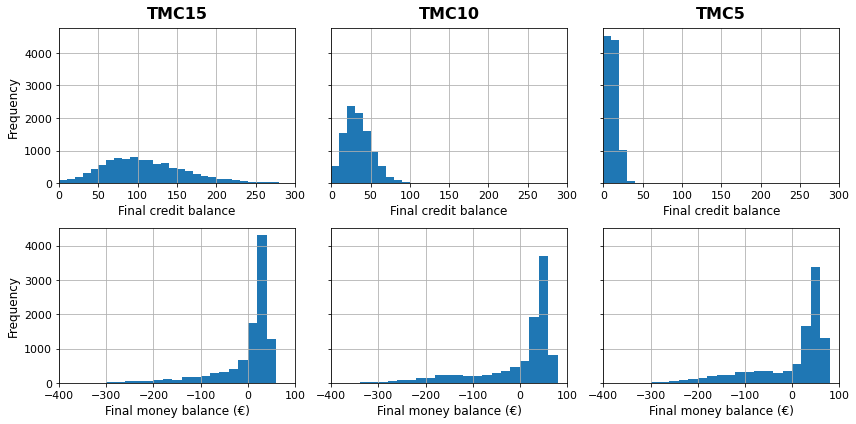

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].tmc_balance.hist(ax=axes[0,i],bins=range(0, 400, 10))
        axes[0, i].set_xlim(0,300)
        axes[0, i].set_xlabel('Final credit balance', fontsize=12)

        travs_df[scheme].money_balance.hist(ax=axes[1,i], bins=range(-400, 100, 20))
        axes[1, i].set_xlabel('Final money balance (€)', fontsize=12)
        axes[1, i].set_xlim(-400,100)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)

fig.tight_layout()
plt.savefig(os.path.join(path,'balance-distr.png'), facecolor='w')

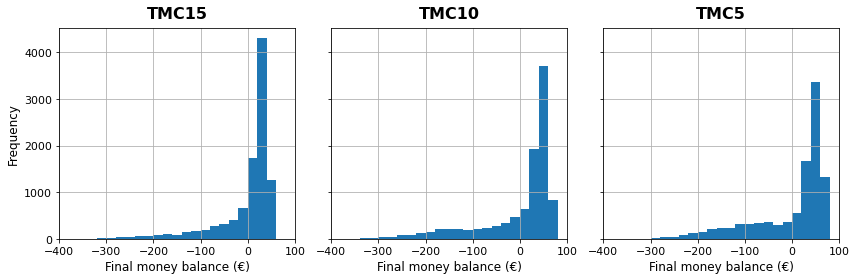

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=n_tmc_scenarios, figsize=(12, 4), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].money_balance.hist(ax=axes[i], bins=range(-400, 100, 20))
        axes[i].set_xlabel('Final money balance (€)', fontsize=12)
        axes[i].set_xlim(-400,100)

        # Subtitle for scheme
        axes[i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
axes[0].set_ylabel('Frequency', fontsize=12)
# axes[1, 0].set_ylabel('Frequency', fontsize=12)

for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)

fig.tight_layout()
plt.savefig(os.path.join(path,'money-balance-distr.png'), facecolor='w')

In [45]:
# fig, axes = plt.subplots(nrows=1, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row', sharex=True)
# i = 0
# for scheme in dem_mgmt_schemes:
#     if scheme.startswith("tmc"):
#         travs_df[scheme].money_balance.hist(ax=axes[i])
#         i+=1
# # travs_df.money_balance.hist(bins=20)

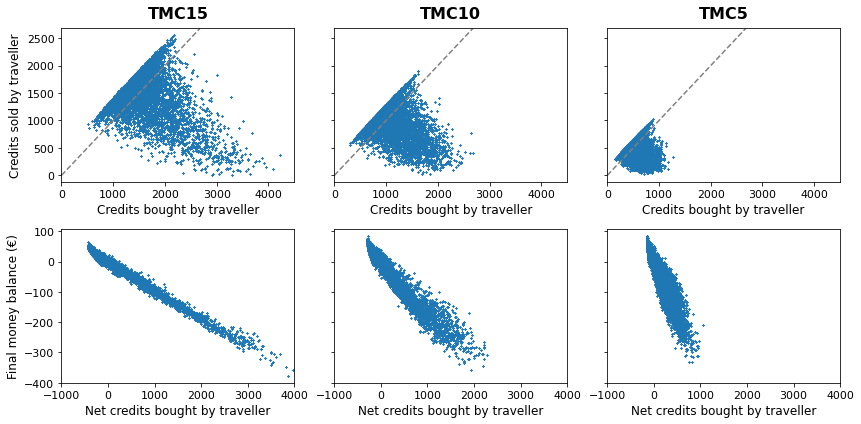

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=n_tmc_scenarios, figsize=(12, 6), sharey='row')
i = 0
for scheme in dem_mgmt_schemes:
    if scheme.startswith("tmc"):
        travs_df[scheme].plot.scatter(x='tot_credit_bought', y='tot_credit_sold', marker='x', s=2, ax=axes[0, i])
        travs_df[scheme]['net_bought'] = travs_df[scheme].tot_credit_bought - travs_df[scheme].tot_credit_sold
        axes[0, i].axline((0, 0), slope=1, linestyle='--', color='grey')
        axes[0, i].set_xlabel('Credits bought by traveller', fontsize=12)
        axes[0, i].set_ylabel('Credits sold by traveller', fontsize=12)
        axes[0, i].set_xlim(0,4500)
        
        travs_df[scheme].plot.scatter(x='net_bought', y='money_balance', marker='x', s=2, ax=axes[1, i])
        axes[1, i].set_xlabel('Net credits bought by traveller', fontsize=12)
        axes[1, i].set_ylabel("Final money balance (€)", fontsize=12)
        axes[1, i].set_xlim(-1000,4000)

        # Subtitle for scheme
        axes[0, i].set_title('{}'.format(scheme.replace("tmc", "TMC")), fontweight='bold', pad=10, fontsize=16)

        i+=1
fig.tight_layout()
for a in axes.flatten():
    a.tick_params(axis='both', which='major', labelsize=11)
plt.savefig(os.path.join(path,'buy-sell-stat.png'), facecolor='w')

In [14]:
pax_df = pd.read_csv(os.path.join(result_path,'1_pax-properties.csv'))

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\arjanderuijter\\Programming\\FleetMaaS\\evaluation\\studies\\tmc_dit4tram\\..\\..\\..\\results\\1_pax-properties.csv'

<AxesSubplot:>

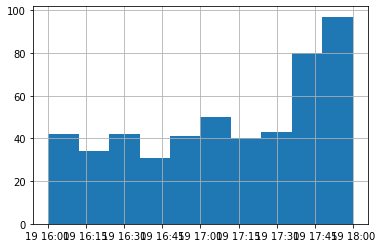

In [ ]:
pax_df['treq_new'] = pd.to_datetime(pax_df['treq'])
pax_df.treq_new.hist()

In [ ]:
albatross_df = pd.read_csv(os.path.join('..\..\..',r'MaaSSim\data\albatross\Amsterdam_demand.csv'))


In [ ]:
albatross_df['treq'] = pd.to_datetime(albatross_df['ET_FROM'])

In [ ]:
albatross_df.treq.dt.time

0         12:23:00
1         12:33:00
2         11:12:00
3         13:35:00
4         14:08:00
            ...   
242083    12:46:00
242084    10:33:00
242085    14:40:00
242086    12:38:00
242087    12:11:00
Name: treq, Length: 242088, dtype: object

<AxesSubplot:>

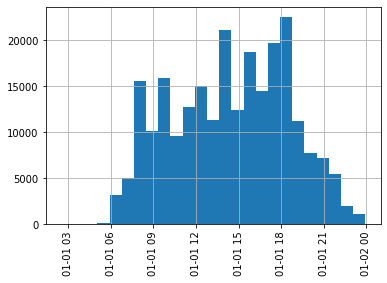

In [ ]:
plt.xticks(rotation=90)
albatross_df.treq.hist(bins=25)